$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

$\text{We will start with a procedure which helps to find a minimizer of the function}$
$f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

$\text{Note that the gradient of:}$
$f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

$\text{We will use the following gradient descent type algorithm:} $

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [15]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 
import matplotlib.pyplot as plt #plotting packge

In [16]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2

In [17]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [18]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [19]:
def find_minimizer2(start_x, tol, step_length):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  no_it=0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    no_it=no_it+1
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
  return x, fvals, no_it

# Q-2

In [20]:
opt_x, fvals_ret, num_iteration = find_minimizer2(np.array([10,10]),10**-3,  0.1)
print('Minimizer=', opt_x, 'and', 'Minimum function value=', fvals_ret)

Minimizer= [-99.99958844  24.99994388] and Minimum function value= [12325, 7888.0, 5048.320000000001, 3230.9247999999993, 2067.791872, 1323.3867980799996, 846.9675507711995, 542.0592324935676, 346.9179087958833, 222.0274616293655, 142.09757544279404, 90.94244828338809, 58.20316690136841, 37.25002681687585, 23.840017162800546, 15.25761098419235, 9.764871029883087, 6.249517459125205, 3.9996911738401533, 2.559802351257707, 1.6382735048049322, 1.0484950430751447, 0.6710368275680882, 0.42946356964356897, 0.27485668457188733, 0.1759082781260078, 0.11258129800064115, 0.07205203072040883, 0.04611329966106277, 0.02951251178308121, 0.018888007541173576, 0.01208832482635049, 0.007736527888864313, 0.004951377848873557, 0.0031688818232796997, 0.0020280843668995063, 0.0012979739948154952, 0.0008307033566815811, 0.000531650148276203, 0.000340256094896659, 0.00021776390073393917, 0.0001393688964697853, 8.919609374066622e-05, 5.7085499994068934e-05, 3.653471999613835e-05, 2.3382220797474075e-05, 1.4964

$\text{The minimizer and minimum function value is [-99.99958844, 24.99994388]} \\ \text{and 1.7253033717248775e-07 respectively.}$

# Q-3

In [21]:
tol_set=[]
iteration_set=[]
for i in range(1,11):
  my_start_x = np.array([10,10])
  my_steplength = 0.1
  my_tol= 10**(-i) #10^{-i}
  tol_set.append(my_tol)
  opt_x, fvals_ret, num_iteration = find_minimizer2(my_start_x, my_tol, my_steplength)
  iteration_set.append(num_iteration)
  print('When p=',i,'Minimizer:',opt_x,'Objective function value:', fvals_ret[-1],'Number of iterations:',num_iteration)

When p= 1 Minimizer: [-99.9553787   24.99391528] Objective function value: 0.0020280843668995063 Number of iterations: 35
When p= 2 Minimizer: [-99.99520882  24.99934666] Objective function value: 2.3382220797474075e-05 Number of iterations: 45
When p= 3 Minimizer: [-99.99958844  24.99994388] Objective function value: 1.7253033717248775e-07 Number of iterations: 56
When p= 4 Minimizer: [-99.99995581  24.99999397] Objective function value: 1.989139359193299e-09 Number of iterations: 66
When p= 5 Minimizer: [-99.99999526  24.99999935] Objective function value: 2.293321544605827e-11 Number of iterations: 76
When p= 6 Minimizer: [-99.99999959  24.99999994] Objective function value: 1.6921726745458407e-13 Number of iterations: 87
When p= 7 Minimizer: [-99.99999996  24.99999999] Objective function value: 1.950942200128245e-15 Number of iterations: 97
When p= 8 Minimizer: [-100.   25.] Objective function value: 2.249273021138356e-17 Number of iterations: 107
When p= 9 Minimizer: [-100.   25.]

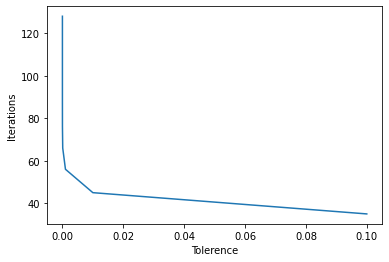

In [22]:
plt.plot(tol_set, iteration_set)
plt.xlabel('Tolerence')
plt.ylabel('Iterations')
plt.show()

$\text{Observations: As the value of p increases, i.e the tolerance becomes smaller,} \\ \text{the number of iterations becomes higher and the objective function tends to more minimum value. This means,} \\ \text{ lesser the tolerence, better the acccuracy but as the number of iterations increase,} \\ \text{ it'll result in the increase of processing time.}$

# Q-4

In [23]:
iteration=[]
num_it=[]
n=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
my_start_x = np.array([10,10])
my_tol= 10**(-5) #10^{-i}
for i in range(len(n)):
  iteration.append(i)
  my_steplength = n[i]
  opt_x, fvals_ret, num_iteration = find_minimizer2(my_start_x, my_tol, my_steplength)
  num_it.append(num_iteration)
  print('When η=',n[i],'Minimizer:',opt_x,'Objective function value:', fvals_ret[-1],'Number of iterations:',num_iteration)


When η= 0.0001 Minimizer: [-99.99999505  24.99999932] Objective function value: 2.49936770204995e-11 Number of iterations: 84571
When η= 0.001 Minimizer: [-99.99999505  24.99999933] Objective function value: 2.494219709847674e-11 Number of iterations: 8450
When η= 0.01 Minimizer: [-99.99999512  24.99999933] Objective function value: 2.4304673044883465e-11 Number of iterations: 838
When η= 0.1 Minimizer: [-99.99999526  24.99999935] Objective function value: 2.293321544605827e-11 Number of iterations: 76
When η= 0.2 Minimizer: [-99.99999685  24.99999957] Objective function value: 1.011747066175869e-11 Number of iterations: 34
When η= 0.4 Minimizer: [-99.99999775  24.99999969] Objective function value: 5.169479687800271e-12 Number of iterations: 11
When η= 0.5 Minimizer: [-100.   25.] Objective function value: 0.0 Number of iterations: 1
When η= 0.6 Minimizer: [-100.00000225   25.00000031] Objective function value: 5.169479687800271e-12 Number of iterations: 11
When η= 0.7 Minimizer: [-10

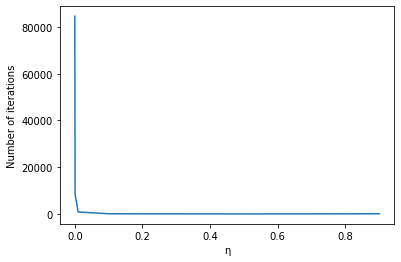

In [24]:
plt.plot(n, num_it)
plt.xlabel('η')
plt.ylabel('Number of iterations')
plt.show()

$\text{So, as the step length increases, first the no. of iterations becomes smaller but after certain iterations,} \\ \text{Here from η= 0.6 the no. of iterations again starts increasings.}$

# Q-5

In [25]:
my_tol= 10**(-5)
my_steplength = 0.1
x_set = [[10000, 10000],[500, 0],[0, 1000],[1, 1],[-500,-2]]
data=[]
for i in range(len(x_set)):
  my_start_x = np.array(x_set[i])
  opt_x, fvals_ret, num_iteration = find_minimizer2(my_start_x, my_tol, my_steplength)
  data.append([x_set[i], opt_x.tolist(), fvals_ret[-1], num_iteration])
  print('When starting x=',x_set[i],' η=0.1, Minimizer:',opt_x,'Objective function value:', fvals_ret[-1],'Number of iterations:',num_iteration)


When starting x= [10000, 10000]  η=0.1, Minimizer: [-99.99999679  25.00000317] Objective function value: 2.0414342669998657e-11 Number of iterations: 98
When starting x= [500, 0]  η=0.1, Minimizer: [-99.99999566  24.99999982] Objective function value: 1.888746375147865e-11 Number of iterations: 84
When starting x= [0, 1000]  η=0.1, Minimizer: [-99.99999954  25.00000452] Objective function value: 2.060780080476227e-11 Number of iterations: 86
When starting x= [1, 1]  η=0.1, Minimizer: [-99.99999564  24.99999896] Objective function value: 2.0052840841640608e-11 Number of iterations: 76
When starting x= [-500, -2]  η=0.1, Minimizer: [-100.00000452   24.99999969] Objective function value: 2.055190630073527e-11 Number of iterations: 82


In [26]:
import pandas as pd
df = pd.DataFrame(data, columns=[['Starting Points','final minimizer', 'final objective function value', 'number of iterations']])
display(df)

Starting Points  ... number of iterations
0  [10000, 10000]  ...                   98
1        [500, 0]  ...                   84
2       [0, 1000]  ...                   86
3          [1, 1]  ...                   76
4      [-500, -2]  ...                   82

[5 rows x 4 columns]

$\text{Observations: Here, the final minimizer value is ~ [-100, 25].}
\\ \text{Now, the starting point [10000, 10000] is the farthest and [1,1] is the nearest } \\
\text{from the minimizer value that's why their no. of iterations are highest} \\
\text{and smallest respectively. }$